## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  79.293513   158.005683  0.053570  10.261918    79.723175
1  92.582537   739.343018  0.427102   6.545346   329.045474
2  42.767347   509.896038  0.512583   3.873914   264.793506
3  11.233781   683.465812  0.542107   2.828021   370.897069
4  95.682459  1745.817068  0.623580   9.250038  1092.607178


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0030473	total: 57.7ms	remaining: 57.7s
1:	learn: 0.9919680	total: 58.2ms	remaining: 29s
2:	learn: 0.9821810	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9700275	total: 59ms	remaining: 14.7s
4:	learn: 0.9572463	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9462756	total: 60ms	remaining: 9.94s
6:	learn: 0.9343084	total: 60.4ms	remaining: 8.56s
7:	learn: 0.9214788	total: 60.9ms	remaining: 7.55s
8:	learn: 0.9103749	total: 61.4ms	remaining: 6.76s
9:	learn: 0.8980968	total: 62ms	remaining: 6.13s
10:	learn: 0.8852593	total: 62.5ms	remaining: 5.62s
11:	learn: 0.8729225	total: 62.9ms	remaining: 5.18s
12:	learn: 0.8605805	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8476922	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8362160	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8263104	total: 65.1ms	remaining: 4s
16:	learn: 0.8168154	total: 65.8ms	remaining: 3.8s
17:	learn: 0.8071179	total: 66.2ms	remaining: 3.61s
18:	learn: 0.7990165	total: 66.7ms	remaining: 3.44s
19:	l

108:	learn: 0.2852496	total: 106ms	remaining: 865ms
109:	learn: 0.2822037	total: 106ms	remaining: 860ms
110:	learn: 0.2794269	total: 107ms	remaining: 854ms
111:	learn: 0.2762876	total: 107ms	remaining: 849ms
112:	learn: 0.2730569	total: 107ms	remaining: 843ms
113:	learn: 0.2705184	total: 108ms	remaining: 838ms
114:	learn: 0.2673758	total: 108ms	remaining: 834ms
115:	learn: 0.2646542	total: 109ms	remaining: 828ms
116:	learn: 0.2621172	total: 110ms	remaining: 828ms
117:	learn: 0.2590814	total: 110ms	remaining: 824ms
118:	learn: 0.2561775	total: 111ms	remaining: 819ms
119:	learn: 0.2531566	total: 111ms	remaining: 813ms
120:	learn: 0.2504522	total: 111ms	remaining: 808ms
121:	learn: 0.2472423	total: 112ms	remaining: 803ms
122:	learn: 0.2451441	total: 112ms	remaining: 798ms
123:	learn: 0.2418615	total: 112ms	remaining: 794ms
124:	learn: 0.2398106	total: 113ms	remaining: 790ms
125:	learn: 0.2370020	total: 113ms	remaining: 785ms
126:	learn: 0.2340670	total: 114ms	remaining: 781ms
127:	learn: 

293:	learn: 0.0596259	total: 185ms	remaining: 445ms
294:	learn: 0.0592055	total: 186ms	remaining: 444ms
295:	learn: 0.0588797	total: 186ms	remaining: 443ms
296:	learn: 0.0584788	total: 187ms	remaining: 442ms
297:	learn: 0.0581126	total: 187ms	remaining: 440ms
298:	learn: 0.0577962	total: 187ms	remaining: 440ms
299:	learn: 0.0574593	total: 188ms	remaining: 439ms
300:	learn: 0.0571224	total: 188ms	remaining: 437ms
301:	learn: 0.0568082	total: 189ms	remaining: 436ms
302:	learn: 0.0564964	total: 189ms	remaining: 435ms
303:	learn: 0.0561233	total: 190ms	remaining: 435ms
304:	learn: 0.0556827	total: 190ms	remaining: 433ms
305:	learn: 0.0553105	total: 191ms	remaining: 433ms
306:	learn: 0.0550370	total: 191ms	remaining: 432ms
307:	learn: 0.0546070	total: 192ms	remaining: 431ms
308:	learn: 0.0543588	total: 192ms	remaining: 430ms
309:	learn: 0.0540030	total: 193ms	remaining: 429ms
310:	learn: 0.0537329	total: 193ms	remaining: 427ms
311:	learn: 0.0534069	total: 193ms	remaining: 426ms
312:	learn: 

527:	learn: 0.0217276	total: 287ms	remaining: 256ms
528:	learn: 0.0216169	total: 287ms	remaining: 256ms
529:	learn: 0.0215131	total: 288ms	remaining: 255ms
530:	learn: 0.0214115	total: 288ms	remaining: 255ms
531:	learn: 0.0213044	total: 289ms	remaining: 254ms
532:	learn: 0.0212057	total: 289ms	remaining: 253ms
533:	learn: 0.0211090	total: 290ms	remaining: 253ms
534:	learn: 0.0210555	total: 290ms	remaining: 252ms
535:	learn: 0.0209522	total: 290ms	remaining: 251ms
536:	learn: 0.0208584	total: 291ms	remaining: 251ms
537:	learn: 0.0207707	total: 291ms	remaining: 250ms
538:	learn: 0.0207143	total: 292ms	remaining: 250ms
539:	learn: 0.0206143	total: 292ms	remaining: 249ms
540:	learn: 0.0205236	total: 293ms	remaining: 248ms
541:	learn: 0.0204393	total: 293ms	remaining: 247ms
542:	learn: 0.0203424	total: 293ms	remaining: 247ms
543:	learn: 0.0202485	total: 294ms	remaining: 246ms
544:	learn: 0.0201824	total: 294ms	remaining: 246ms
545:	learn: 0.0201009	total: 294ms	remaining: 245ms
546:	learn: 

714:	learn: 0.0120163	total: 366ms	remaining: 146ms
715:	learn: 0.0119856	total: 367ms	remaining: 145ms
716:	learn: 0.0119565	total: 367ms	remaining: 145ms
717:	learn: 0.0119279	total: 368ms	remaining: 144ms
718:	learn: 0.0118980	total: 368ms	remaining: 144ms
719:	learn: 0.0118700	total: 368ms	remaining: 143ms
720:	learn: 0.0118434	total: 369ms	remaining: 143ms
721:	learn: 0.0118159	total: 369ms	remaining: 142ms
722:	learn: 0.0117869	total: 369ms	remaining: 142ms
723:	learn: 0.0117599	total: 370ms	remaining: 141ms
724:	learn: 0.0117316	total: 370ms	remaining: 140ms
725:	learn: 0.0117051	total: 371ms	remaining: 140ms
726:	learn: 0.0116621	total: 371ms	remaining: 139ms
727:	learn: 0.0116239	total: 372ms	remaining: 139ms
728:	learn: 0.0115774	total: 372ms	remaining: 138ms
729:	learn: 0.0115355	total: 372ms	remaining: 138ms
730:	learn: 0.0115098	total: 373ms	remaining: 137ms
731:	learn: 0.0114687	total: 373ms	remaining: 137ms
732:	learn: 0.0114290	total: 374ms	remaining: 136ms
733:	learn: 

952:	learn: 0.0062737	total: 467ms	remaining: 23ms
953:	learn: 0.0062575	total: 468ms	remaining: 22.6ms
954:	learn: 0.0062320	total: 468ms	remaining: 22.1ms
955:	learn: 0.0062257	total: 468ms	remaining: 21.6ms
956:	learn: 0.0062230	total: 469ms	remaining: 21.1ms
957:	learn: 0.0062203	total: 469ms	remaining: 20.6ms
958:	learn: 0.0062174	total: 469ms	remaining: 20.1ms
959:	learn: 0.0061926	total: 470ms	remaining: 19.6ms
960:	learn: 0.0061865	total: 470ms	remaining: 19.1ms
961:	learn: 0.0061839	total: 471ms	remaining: 18.6ms
962:	learn: 0.0061716	total: 471ms	remaining: 18.1ms
963:	learn: 0.0061557	total: 472ms	remaining: 17.6ms
964:	learn: 0.0061314	total: 472ms	remaining: 17.1ms
965:	learn: 0.0061013	total: 473ms	remaining: 16.6ms
966:	learn: 0.0060774	total: 473ms	remaining: 16.1ms
967:	learn: 0.0060540	total: 474ms	remaining: 15.7ms
968:	learn: 0.0060280	total: 474ms	remaining: 15.2ms
969:	learn: 0.0060051	total: 475ms	remaining: 14.7ms
970:	learn: 0.0059762	total: 475ms	remaining: 14

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

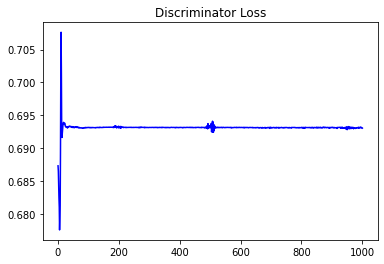

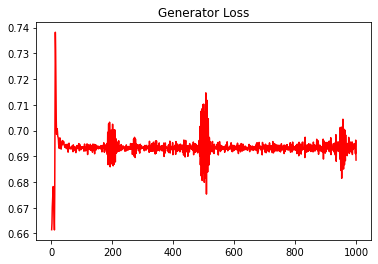

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.03676662832471242


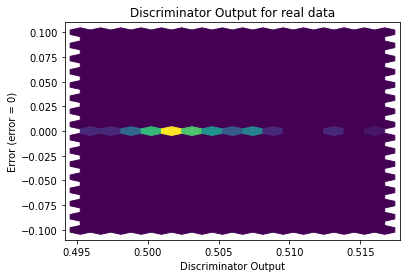

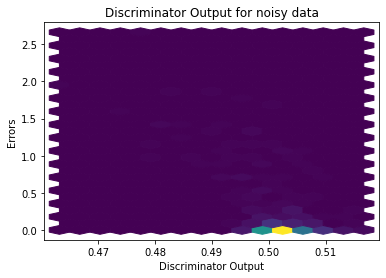

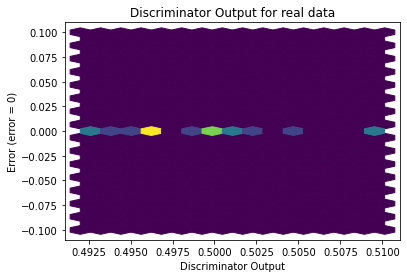

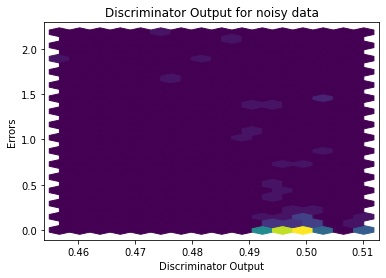

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


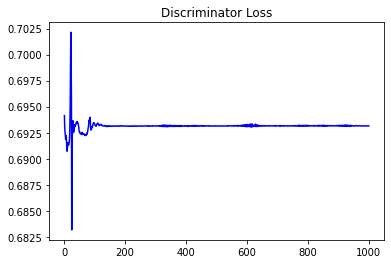

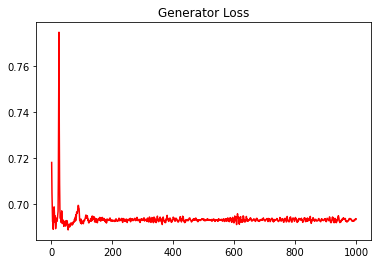

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04881470805832937


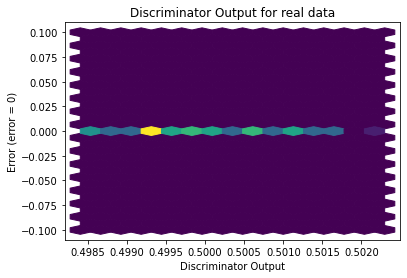

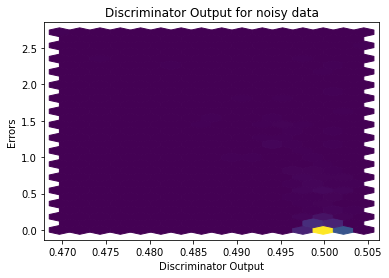

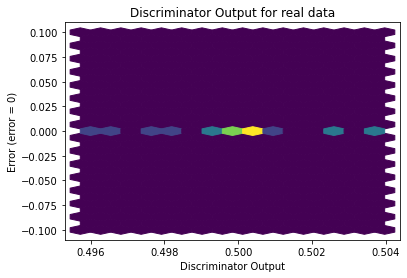

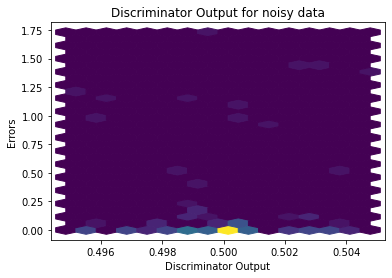

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0532]], requires_grad=True)
